# Test ANOVA and p-values

En este notebook se estudiará la relevancia de los parámetros del dataset con respecto a la felicidad, la variable sobre la que nos planteamos más preguntas. Conocer cuáles son los parámetros más relevantes nos servirá para utilizarlos para predecir, visualizar y en definitiva analizar mejor la variable target.

Para ello, utilizaremos la técnica del test ANOVA que nos indica si (probabilísticamente) las medias de dos o más muestras son iguales. Unos p-valores bajos indican que las medias difieren, lo cual es una característica deseable de cualquier feature, y viceversa. Los parámetros con p-valores menores serán los que mejor nos permitan estudiar la felicidad.


In [2]:
from sklearn.feature_selection import f_classif, SelectPercentile
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def read_data(year=None):
    if year:
        return __read_year(year)
    df = __read_year(2015)
    for year in [2016, 2017, 2018, 2019]:
        df = pd.concat([df, __read_year(year)], axis=0)
    df = df.drop(columns = ['country', 'year'])
    columns = [c for c in df.columns if not df[c].isnull().values.all()]
    df = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(df), columns=columns)
    df = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)
    return df

def __read_year(year):
    df = pd.read_csv('../data/'+ str(year) +'.csv')
    df['year'] = year
    return df



# DE UNA PRÁCTICA DE LA ASIGNATURA MLE:
def muestra_relevancias(nombres, relevancias):
    '''Función para mostrar una gráfica con el grado de relevancia de cada atributo
    
    Recibe:
       - nombres: nombres de todos los atributos
       - relevancias: de cada atributo, calculadas mediante alguna técnica
    '''
    plt.figure(figsize=(len(nombres)/4,5))
    serie = pd.Series(relevancias, index=nombres)
    serie.plot(kind='bar')

def muestra_seleccion(nombres, mascara):
    '''Función para mostrar los nombres de los atributos seleccionados a partir de una máscara de booleanos
    
    Recibe:
       - nombres: nombres de todos los atributos
       - mascara: lista de booleanos que determina si un atributo se selecciona, o no
    '''    
    seleccionados = [n for n,m in zip(nombres, mascara) if m]
    print(len(seleccionados), seleccionados)

In [4]:
df = read_data()
df.head()

,health,family,economy,freedom,generosity,corruption,dystopia,score
0,0.825092,0.820870,0.666274,0.919296,0.354121,0.760595,0.623743,0.964145
1,0.830710,0.852938,0.621336,0.868467,0.520598,0.256292,0.676357,0.959023
2,0.766556,0.827603,0.632385,0.896934,0.407350,0.876175,0.616521,0.952325
3,0.775819,0.809580,0.696088,0.925041,0.414032,0.661394,0.608904,0.951340
4,0.793716,0.804507,0.632772,0.874268,0.546622,0.597144,0.605043,0.932624


In [5]:
TARGET = 'score'

y = df.pop(TARGET)
X = df

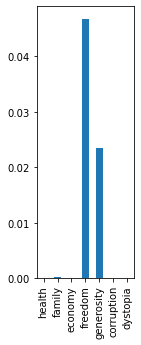

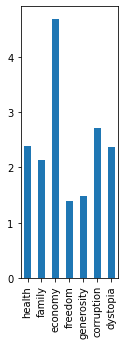

In [6]:
fvalues, pvalues = f_classif(X, y)
muestra_relevancias(X.columns.values, pvalues)
muestra_relevancias(X.columns.values, fvalues)


#the p-value is used for hypothesis testing. ANOVA tests whether means of two or more samples
#are equal. A low p-value shows that at least 2 samples have different means which is a good
#indicator for a feature. Usually values below 0.1 or 0.05 or 0.01 mean that this feature could
#be used.
#fvalues: variation between sample means / variation within the samples

In [7]:
_, pvalues = f_classif(X, y)
umbral = 0.05
atributos_pvalues = zip(X.columns.values, pvalues)
print("Útiles: ", umbral) 
for a,p in atributos_pvalues:
    if p<=umbral:
        print("   ", a, "->", p)
        
_, pvalues = f_classif(X, y)
umbral = 0.05
atributos_pvalues = zip(X.columns.values, pvalues)
print("\nNo útiles: ", umbral) 
for a,p in atributos_pvalues:
    if p>umbral:
        print("   ", a, "->", p)

Útiles:  0.05
    health -> 1.274319993495839e-05
    family -> 0.0001083174982530592
    economy -> 2.967209127860035e-12
    freedom -> 0.04665939637667144
    generosity -> 0.023517944252092814
    corruption -> 1.067666164144516e-06
    dystopia -> 1.6614385217133244e-05

No útiles:  0.05


In [8]:
selector = SelectPercentile(f_classif, percentile=50)
selector.fit(X,y)
mascara = selector.get_support()
s = muestra_seleccion(X.columns.values, mascara)

3 ['health', 'economy', 'corruption']


## Generalización

A continuación, vamos a aplicar el mismo razonamiento hecho hasta ahora, pero para una variable general de la que se tiene interés. Para ello, definiremos una función que, dado un nombre de una variable, nos informe de los parámetros útiles y de los no útiles. Posteriormente, podremos llamar dicha función para los parámetros _health_, _economy_, y los que se deseen...

In [9]:
def best_features(target_name, dataframe):
    df = dataframe.copy()

    y = df.pop(target_name)
    X = df
    
    _, pvalues = f_classif(X, y)
    umbral = 0.05
    atributos_pvalues = zip(X.columns.values, pvalues)
    print("Útiles: ", umbral) 
    for a,p in atributos_pvalues:
        if p<=umbral:
            print("   ", a, "->", p)

    _, pvalues = f_classif(X, y)
    umbral = 0.05
    atributos_pvalues = zip(X.columns.values, pvalues)
    print("\nNo útiles: ", umbral) 
    for a,p in atributos_pvalues:
        if p>umbral:
            print("   ", a, "->", p)

In [10]:
df = read_data()

for column in df.columns:
    print('******    {}    ******\n'.format(column))
    best_features(column, df)
    print('\n\n')

******    health    ******

Útiles:  0.05
    family -> 2.1458156143480332e-07
    economy -> 0.0019496207814510302
    freedom -> 5.0390649566158396e-23
    corruption -> 0.017561755724758054
    score -> 0.003406697313026365

No útiles:  0.05
    generosity -> 0.6950734552453552
    dystopia -> 0.21072266881987975



******    family    ******

Útiles:  0.05
    health -> 0.037465932411100314
    economy -> 1.110247965883946e-05
    generosity -> 0.040715976952153156
    dystopia -> 2.482654180300463e-25
    score -> 1.5914392713977302e-06

No útiles:  0.05
    freedom -> 0.32135228460805043
    corruption -> 0.3281903387597842



******    economy    ******

Útiles:  0.05
    health -> 0.000875440857713059
    family -> 4.1103815601964095e-05
    generosity -> 0.013819082410911914
    corruption -> 0.03535532767899637
    dystopia -> 1.1913698860922931e-05
    score -> 5.416699313188013e-05

No útiles:  0.05
    freedom -> 0.7087335904224609



******    freedom    ******

Útiles:  

De esta forma, hemos conseguido responder a la pregunta sobre cuáles parámetros son más eficacer para predecir linealmente una variable objetivo cualquiera.